# Algorithme d'intelligence artificiel

Base de donnée : dossier 2019, hash : 7812f3c2a5ab980c3d0041d97129e0b10e2926bb, fichier de base de donnée : database-2019, hash : 14991a36b6eac28953cd16ad0113803ee9e42c5a

In [1]:
import tools
from confusion_matrix.confusion_matrix import plot_confusion_matrix_from_data

## Get and split Data

In [2]:
path_train = '../data/train/'
path_test = '../data/test/'

X_train, y_train = tools.getDataTransformed(path_train + 'database.csv', path_train)
X_test, y_test = tools.getDataTransformed(path_test + 'database.csv', path_test)

## Nearest Neighbors

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

grid_params = {
    'n_estimators': np.arange(10, 511, 100),
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), grid_params)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'n_estimators': 410}
0.8280965076857246


0.8175182481751825


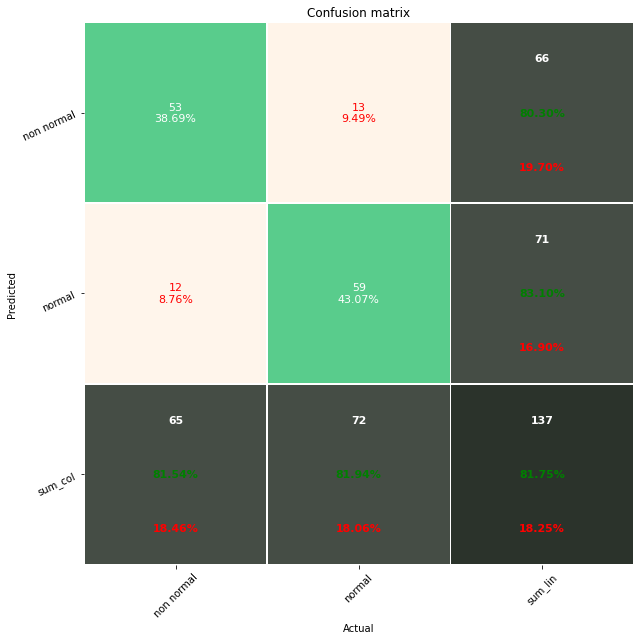

In [4]:
print(model.score(X_test, y_test))
predictions = model.predict(X_test)
plot_confusion_matrix_from_data(y_test, predictions,columns=['non normal','normal'])

In [5]:
from sklearn.metrics import classification_report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predictions
)
print(sk_report)

              precision    recall  f1-score   support

           0   0.803030  0.815385  0.809160        65
           1   0.830986  0.819444  0.825175        72

    accuracy                       0.817518       137
   macro avg   0.817008  0.817415  0.817168       137
weighted avg   0.817722  0.817518  0.817577       137



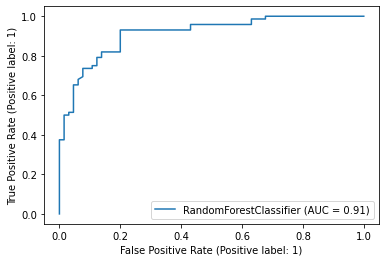

In [6]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)

[553 680]


Text(0.5, 1.0, 'Test')

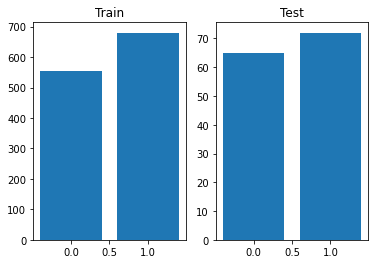

In [7]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
temp_train, n = np.histogram(np.array(y_train),2)
temp_test, n = np.histogram(np.array(y_test),2)
print(temp_train)
ax1.bar([0,1], temp_train)
ax1.set_title("Train")
ax2.bar([0,1],temp_test)
ax2.set_title("Test")